Установка библиотеки PySpark

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 10.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=f901fd48cf2f2f46977f02805baa35bc69ddb62031e4cf7ff310176c72819d88
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [2]:
from pyspark.sql.session import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [3]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = spark.read.csv('/content/drive/MyDrive/notebooks/input/дз_iris.csv',
                    header=True, 
                    sep=',', 
                    inferSchema=True,
                    quote=""
                    )

In [5]:
df.show()

+-------------+---------------+----------------+---------------+------------+
|"sepal.length|""sepal.width""|""petal.length""|""petal.width""|""variety"""|
+-------------+---------------+----------------+---------------+------------+
|         "5.1|            3.5|             1.4|            0.2| ""Setosa"""|
|         "4.9|            3.0|             1.4|            0.2| ""Setosa"""|
|         "4.7|            3.2|             1.3|            0.2| ""Setosa"""|
|         "4.6|            3.1|             1.5|            0.2| ""Setosa"""|
|           "5|            3.6|             1.4|            0.2| ""Setosa"""|
|         "5.4|            3.9|             1.7|            0.4| ""Setosa"""|
|         "4.6|            3.4|             1.4|            0.3| ""Setosa"""|
|           "5|            3.4|             1.5|            0.2| ""Setosa"""|
|         "4.4|            2.9|             1.4|            0.2| ""Setosa"""|
|         "4.9|            3.1|             1.5|            0.1|

In [6]:
import pyspark.sql.functions as F

df = df.withColumnRenamed('"sepal.length', 'sepal_length') \
       .withColumnRenamed('""sepal.width""', 'sepal_width') \
       .withColumnRenamed('""petal.length""', 'petal_length') \
       .withColumnRenamed('""petal.width""', 'petal_width') \
       .withColumnRenamed('""variety"""', 'variety')
df.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    variety|
+------------+-----------+------------+-----------+-----------+
|        "5.1|        3.5|         1.4|        0.2|""Setosa"""|
|        "4.9|        3.0|         1.4|        0.2|""Setosa"""|
|        "4.7|        3.2|         1.3|        0.2|""Setosa"""|
|        "4.6|        3.1|         1.5|        0.2|""Setosa"""|
|          "5|        3.6|         1.4|        0.2|""Setosa"""|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [7]:
df=df.withColumn('variety', F.regexp_replace('variety', '\"',''))\
.withColumn('sepal_length', F.regexp_replace('sepal_length', '\"',''))

df.show(10)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|           5|        3.6|         1.4|        0.2| Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|
|           5|        3.4|         1.5|        0.2| Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 10 rows



In [8]:
df.groupBy('variety') \
  .agg(F.min("sepal_length").alias("min_sl"), 
       F.max("sepal_length").alias("max_sl"),
       F.avg("sepal_length").alias("avg_sl"),
       F.min("sepal_width").alias("min_sw"), 
       F.max("sepal_width").alias("max_sw"),
       F.avg("sepal_width").alias("avg_sw"),
       F.min("petal_length").alias("min_pl"), 
       F.max("petal_length").alias("max_pl"),
       F.avg("petal_length").alias("avg_pl"),
       F.min("petal_width").alias("min_pw"), 
       F.max("petal_width").alias("max_pw"),
       F.avg("petal_width").alias("avg_pw")
       ).show()

+----------+------+------+-----------------+------+------+------------------+------+------+------------------+------+------+------------------+
|   variety|min_sl|max_sl|           avg_sl|min_sw|max_sw|            avg_sw|min_pl|max_pl|            avg_pl|min_pw|max_pw|            avg_pw|
+----------+------+------+-----------------+------+------+------------------+------+------+------------------+------+------+------------------+
|    Setosa|   4.3|   5.8|5.005999999999999|   2.3|   4.4| 3.428000000000001|   1.0|   1.9|1.4620000000000002|   0.1|   0.6|0.2459999999999999|
|Versicolor|   4.9|     7|            5.936|   2.0|   3.4|2.7700000000000005|   3.0|   5.1|              4.26|   1.0|   1.8|1.3259999999999998|
| Virginica|   4.9|   7.9|6.587999999999998|   2.2|   3.8|2.9739999999999998|   4.5|   6.9|             5.552|   1.4|   2.5|             2.026|
+----------+------+------+-----------------+------+------+------------------+------+------+------------------+------+------+------------

Другой способ привести файл в порядок

In [9]:
with open('/content/drive/MyDrive/notebooks/input/дз_iris.csv') as file1:
  with open('/content/drive/MyDrive/notebooks/input/iris_2.csv', 'w') as file2:
    for line in file1:
      file2.write(line.replace('"', ''))

df_2 = spark.read.csv('/content/drive/MyDrive/notebooks/input/iris_2.csv', inferSchema=True, header=True)

df_2 = df_2.withColumnRenamed('sepal.length', 'sepal_length')
df_2 = df_2.withColumnRenamed('sepal.width', 'sepal_width')
df_2 = df_2.withColumnRenamed('petal.length', 'petal_length')
df_2 = df_2.withColumnRenamed('petal.width', 'petal_width')

In [10]:
df_2.groupBy('variety') \
  .agg(F.min("sepal_length").alias("min_sl"), 
       F.max("sepal_length").alias("max_sl"),
       F.avg("sepal_length").alias("avg_sl"),
       F.min("sepal_width").alias("min_sw"), 
       F.max("sepal_width").alias("max_sw"),
       F.avg("sepal_width").alias("avg_sw"),
       F.min("petal_length").alias("min_pl"), 
       F.max("petal_length").alias("max_pl"),
       F.avg("petal_length").alias("avg_pl"),
       F.min("petal_width").alias("min_pw"), 
       F.max("petal_width").alias("max_pw"),
       F.avg("petal_width").alias("avg_pw")
       ).show()

+----------+------+------+-----------------+------+------+------------------+------+------+------------------+------+------+------------------+
|   variety|min_sl|max_sl|           avg_sl|min_sw|max_sw|            avg_sw|min_pl|max_pl|            avg_pl|min_pw|max_pw|            avg_pw|
+----------+------+------+-----------------+------+------+------------------+------+------+------------------+------+------+------------------+
| Virginica|   4.9|   7.9|6.587999999999998|   2.2|   3.8|2.9739999999999998|   4.5|   6.9|             5.552|   1.4|   2.5|             2.026|
|    Setosa|   4.3|   5.8|5.005999999999999|   2.3|   4.4| 3.428000000000001|   1.0|   1.9|1.4620000000000002|   0.1|   0.6|0.2459999999999999|
|Versicolor|   4.9|   7.0|            5.936|   2.0|   3.4|2.7700000000000005|   3.0|   5.1|              4.26|   1.0|   1.8|1.3259999999999998|
+----------+------+------+-----------------+------+------+------------------+------+------+------------------+------+------+------------

In [12]:
# загружаем необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()

# 4. Постройте точечную диаграмму для petal_length и petal_width, раскрашенный по типам цветков.

df_1 = df.toPandas()



In [14]:
df_1

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    object 
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


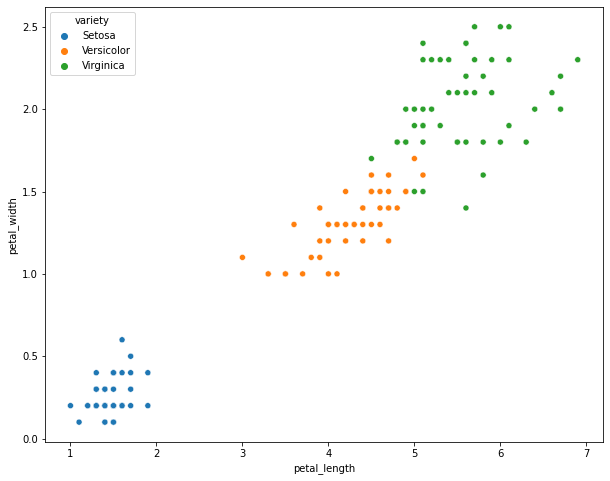

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='petal_length', y='petal_width', hue='variety', data=df_1, legend="full")
plt.show()

In [45]:
from pyspark.sql import SparkSession, functions
rule = functions.when(df.petal_length < 1.5, 'Setosa').otherwise('Unknow')

In [46]:
df = df.withColumn('prediction', rule)
df.show(5)

+------------+-----------+------------+-----------+-------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|prediction|
+------------+-----------+------------+-----------+-------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|    Unknow|
|           5|        3.6|         1.4|        0.2| Setosa|    Setosa|
+------------+-----------+------------+-----------+-------+----------+
only showing top 5 rows



In [47]:
df.where((df.prediction == 'Setosa') & (df.variety == 'Setosa')).count()

24

In [48]:
df.where((df.prediction == 'Setosa') & (df.variety != 'Setosa')).count()

0